Exploration of the dataset

In [15]:
import pandas as pd
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

In [9]:
DATASETS_LOCATION = '/home/mibo/Datasets/m9k/'
#AUTHORS_DATA_LOCATION = DATASETS_LOCATION + 'author_profiles.csv'
#COMMENTS_DATA_LOCATION = DATASETS_LOCATION + 'comments_style_stat.csv'
FEATURES_DATA_LOCATION = DATASETS_LOCATION + 'mb10k_features.csv'
COMMENTS_LOCATION = '/home/mibo/Datasets/comments_last_100_min_20com_per_auth_w_wc_10_200.csv'

In [12]:
authors_df = pd.read_csv(FEATURES_DATA_LOCATION)
comments_df = pd.read_csv(COMMENTS_LOCATION)

In [19]:
agree_df = authors_df['agreeableness']
open_df = authors_df['openness']
concis_df = authors_df['conscientiousness']
extra_df = authors_df['extraversion']
neuro_df = authors_df['neuroticism']

In [124]:
authors_with_mbti = list(authors_df[authors_df.introverted.notnull()]['author'])
authors_with_big5 = list(authors_df[authors_df.agreeableness.notnull()]['author'])

In [105]:
mbti_labels = ['introverted', 'intuitive', 'thinking', 'perceiving']
big5_labels = ['agreeableness', 'openness', 'conscientiousness', 'extraversion', 'neuroticism']

In [80]:
#Checking the percentage of features and elements we have for each author
authors_analysis = pd.DataFrame(list(zip(list(authors_df.columns), list(authors_df.isnull().sum(axis = 0)))), columns=['feature', 'nan_count'])
authors_analysis['percentage'] = authors_analysis['nan_count']/len(authors_df)

In [85]:
features_with_nan = authors_analysis[authors_analysis['nan_count'] != 0]
features_with_nan

,feature,nan_count,percentage
1,mbti_type,1207,0.1207
2,introverted,1207,0.1207
3,intuitive,1207,0.1207
4,thinking,1207,0.1207
5,perceiving,1207,0.1207
6,gender,7134,0.7134
7,age,8256,0.8256
8,enneagram,9231,0.9231
9,country,7974,0.7974
10,state,9190,0.9190


In [86]:
a1 = authors_df['mbti_type'].isnull() 
a2 = authors_df['openness'].isnull()
authors_with_no_personality = [a[2] for a in list(zip(a1,a2, range(0,len(authors_df)))) if a[0] == True and a[1] == True]

In [87]:
authors_df.iloc[authors_with_no_personality, :15]

,author,mbti_type,introverted,intuitive,thinking,perceiving,gender,age,enneagram,country,state,type,agreeableness,openness,conscientiousness
371,ApricotAmber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2464,Komatik,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2499,KuteKitteh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3038,NYPunk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5124,_reLight_,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


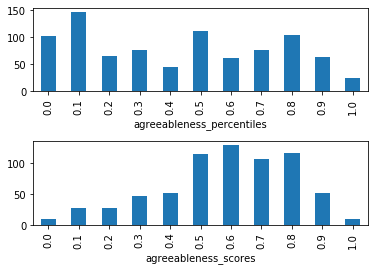

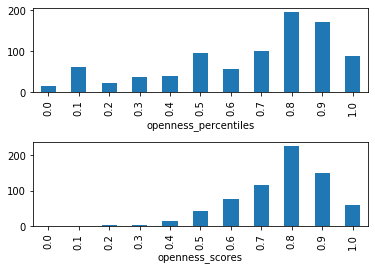

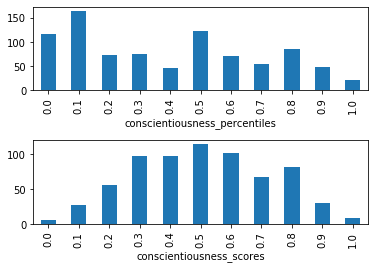

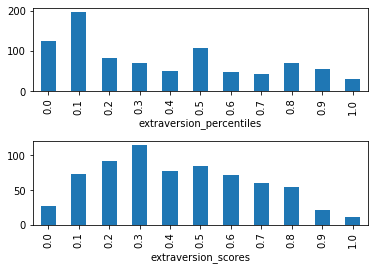

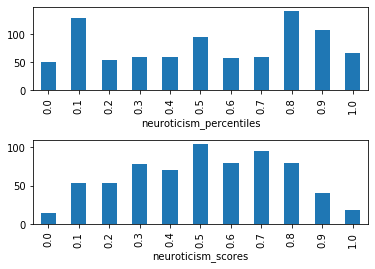

In [181]:
for big5_trait in big5_labels:
    plt.figure(1)
    plt.subplots_adjust(hspace=0.6)
    plt.subplot(211)
    authors_df[(authors_df[big5_trait].notnull()) & (authors_df.test_scale=='percentiles')][big5_trait].apply(lambda x : round(x/100,1)).value_counts().sort_index().plot.bar()
    plt.xlabel(big5_trait+'_percentiles')
    plt.subplot(212)
    authors_df[(authors_df[big5_trait].notnull()) & (authors_df.test_scale=='scores')][big5_trait].apply(lambda x : round(x/100,1)).value_counts().sort_index().plot.bar()
    plt.xlabel(big5_trait+'_scores')
    plt.show()

In [150]:
authors_with_both_persos = [a[2] for a in list(zip(a1,a2, range(0,len(authors_df)))) if a[0] == False and a[1] == False]
len(authors_with_both_persos)

366

In [182]:
for mbti_trait in mbti_labels:
    mbti_cur_per = authors_df[mbti_trait].sum()/len(authors_df)
    print(f'{mbti_trait} {mbti_cur_per} : {1-mbti_cur_per}')

introverted 0.6945 : 0.3055
intuitive 0.7787 : 0.22130000000000005
thinking 0.566 : 0.43400000000000005
perceiving 0.5156 : 0.48440000000000005


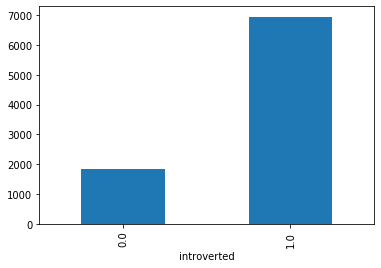

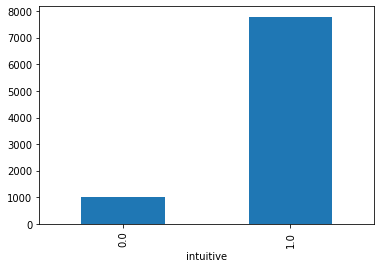

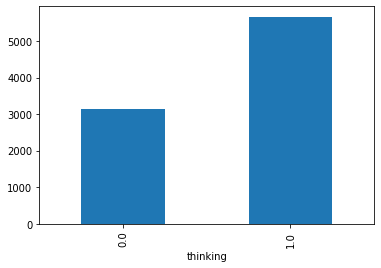

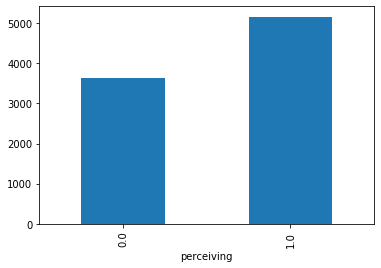

In [130]:
for mbti_trait in mbti_labels:
    authors_df.groupby([mbti_trait])[mbti_trait].count().plot.bar()
    plt.show()

In [171]:
print(len(authors_df[authors_df.test_scale == 'scores']['openness']))
print(len(authors_df[authors_df.test_scale == 'percentiles']['openness']))

730
904


In [21]:
list(authors_df.columns)

['author',
 'mbti_type',
 'introverted',
 'intuitive',
 'thinking',
 'perceiving',
 'gender',
 'age',
 'enneagram',
 'country',
 'state',
 'type',
 'agreeableness',
 'openness',
 'conscientiousness',
 'extraversion',
 'neuroticism',
 'is_description',
 'is_percentile',
 'is_score',
 'contains_details',
 'num_comments',
 'en_comments',
 'en_comments_percentage',
 'region',
 'continent',
 'country_code',
 'enneagram_type',
 'enneagram_wing',
 'is_native_english_country',
 'predicted_test',
 'test_name',
 'test_scale',
 '16pers_ta',
 'test_result_type',
 'wc',
 'help',
 'office',
 'dance',
 'money_x',
 'wedding',
 'domestic_work',
 'sleep',
 'medical_emergency',
 'cold',
 'hate',
 'cheerfulness',
 'aggression',
 'occupation',
 'envy',
 'anticipation_x',
 'family_x',
 'vacation',
 'crime',
 'attractive',
 'masculine',
 'prison',
 'health_x',
 'pride',
 'dispute',
 'nervousness',
 'government',
 'weakness',
 'horror',
 'swearing_terms',
 'leisure_x',
 'suffering',
 'royalty',
 'wealthy',
 '

No handles with labels found to put in legend.


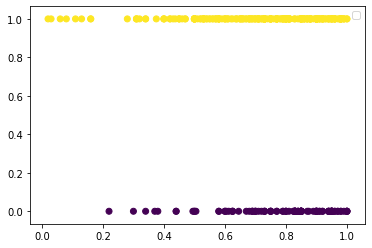

In [102]:
ka = pd.read_csv(AUTHORS_DATA_LOCATION)

In [104]:
ka.columns

Index(['author', 'mbti_type', 'introverted', 'intuitive', 'thinking',
       'perceiving', 'gender', 'age', 'enneagram', 'country', 'state', 'type',
       'agreeableness', 'openness', 'conscientiousness', 'extraversion',
       'neuroticism', 'is_description', 'is_percentile', 'is_score',
       'contains_details', 'num_comments', 'en_comments',
       'en_comments_percentage', 'region', 'continent', 'country_code',
       'enneagram_type', 'enneagram_wing', 'is_native_english_country',
       'predicted_test', 'test_name', 'test_scale', '16pers_ta',
       'test_result_type'],
      dtype='object')